# Investigación Corta 2

## Pre-procesamiento de los datos

El pre-procesado es la primera etapa en el aprendizaje automatizado (Machine Learning). Se le aplica a todos los set de datos que se decean procesar y analisar.

Primero que todo se importan las librerías necesarias.

In [17]:
# Librería para el majeno de set de datos
import pandas as pd
# Librería numérica
import numpy as np
# Librería para graficar
import matplotlib.pyplot as plt

Posteriormente se cargar el *dataset*.

In [18]:
filename = "hcvdat0.csv"
df = pd.read_csv(filename,engine="python",delimiter='\,')
df.head()

,"""""","""Category""","""Age""","""Sex""","""ALB""","""ALP""","""ALT""","""AST""","""BIL""","""CHE""","""CHOL""","""CREA""","""GGT""","""PROT"""
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Mejorar un poco los nombres de las columnas

In [19]:
for label in df.columns:
    df.rename({label:label[1:len(label)-1]},axis=1,inplace=True)
df

,,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""611""","""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""612""","""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""613""","""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""614""","""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


La primera columna no aporta nada. Así que se puede eliminar.

In [20]:
del df[""]
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Información del dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


De la información obtenida se puede observar que la columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** presentan datos faltantes.

### Outliers

Antes de rellenar los valores faltantes. Es importante encontrar los *outliers* o valores fuera del rango normal.
Para dicha labor se usará la siguiente función:

In [6]:
def detect_outliers(data_1,threshold=3):
    outliers=[[],[]]
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for idx,y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers[0].append(y)
            outliers[1].append(idx)
    return outliers

Para saber cuales valores estan fuera del rango habitual se colsulto la enciclopedia de la universidad de Rochester [2]. Se encontraron los siguientes rangos:

* **ALB**: *Albumin* (34 - 54 g/L).
* **ALP**: *Alkaline phosphatase* (44 - 147 U/L)
* **ALT**: *Alanine-amino-transferas* (menos de 44 - 1000 IU/L)
* **AST**: *Aspartate amino-transferase* (9 - 40 units/L)
* **BIL**: *Bilirubin* (10 - 25 mg/L)
* **CHE**: *Cholinesterase* ¡No se encontro un rango claro con el cual trabajar!
* **CHOL**: *Cholesterol* ¡No se encontro un rango claro con el cual trabajar!
* **CREA**: *Creatinine* (9 - 13 mg/L)
* **GGT**: *$\gamma$-glutamyl-transferase* (5 - 61 IU/L) [x7 para recien nacidos].
* **PROT**: *Proteina* (36 - 52 g/L)

In [7]:
strings = ["ALB outliers:","ALP outliers:","ALT outliers:","AST outliers:","BIL outliers:",
           "CHE outliers:","CHOL outliers:","CREA outliers:","GGT outliers:","PROT outliers:"]
thresholds = [4,3,10,3,3,8,8,2,3,6]

delete_idx = []

for i,string in enumerate(strings):
    data_1 = df[df.columns[3+i]]
    outlier = detect_outliers(data_1,thresholds[i])
    print(string,outlier[0])
    for idx in outlier[1]:
        if idx not in delete_idx:
            delete_idx.append(idx)
            
df.drop(index=delete_idx,inplace=True)

ALB outliers: [82.2, 14.9]
ALP outliers: [208.2, 190.7, 416.6]
ALT outliers: [325.3]
AST outliers: [188.7, 146.6, 164.2, 187.7, 324.0, 187.9, 161.9, 263.1, 185.0, 319.8, 181.8, 143.2, 150.0, 285.8]
BIL outliers: [200.0, 254.0, 91.0, 119.0, 209.0, 117.0, 200.0]
CHE outliers: []
CHOL outliers: []
CREA outliers: [519.0, 1079.1, 485.9]
GGT outliers: [239.0, 345.6, 218.3, 295.6, 392.2, 491.0, 399.5, 273.7, 400.3, 650.9]
PROT outliers: []


 ### Valores faltantes
 
 Como se había encontrado anteriormente en las columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** hay datos faltantes.

In [22]:
change = True
label="ALB";df[label].fillna(df[label].mean(),inplace=change)
label="ALP";df[label].fillna(df[label].mean(),inplace=change)
label="ALT";df[label].fillna(df[label].mean(),inplace=change)
label="CHOL";df[label].fillna(df[label].mean(),inplace=change)
label="PROT";df[label].fillna(df[label].mean(),inplace=change)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


### EDA

Descripción estadística del *dataset*

In [23]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Visualización de los datos.

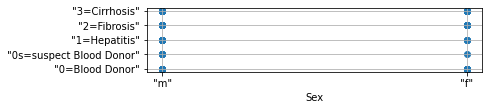

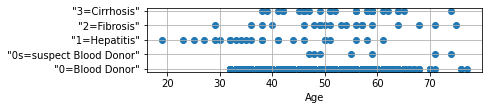

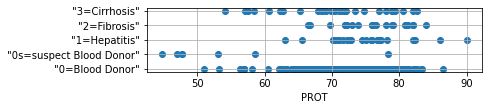

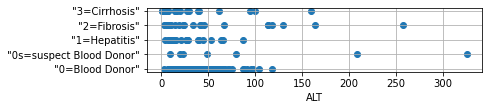

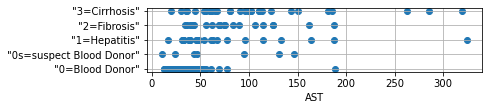

In [24]:
label = "Sex"
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = "Age"
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'PROT'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALT'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'AST'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

 Observando las gráficas se pueden tener algunas conclusiones preliminares. Como por ejemplo, pareciera no haber relación entre la categorización y el sexo. Por otro lado pareciera haber una relación entre el **ALT** y el **AST**. Además de una vaga relación entre la edad y **PROT**. 

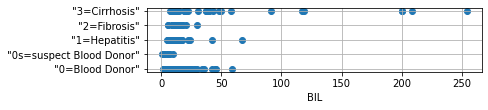

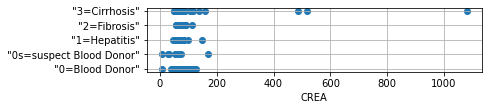

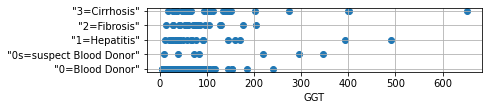

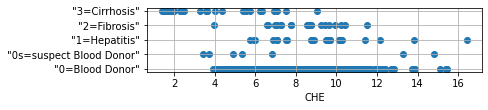

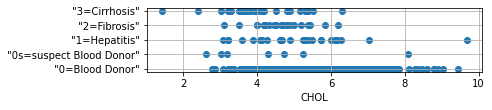

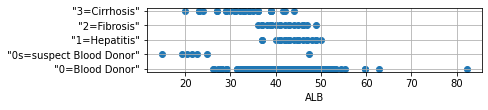

In [25]:
label = 'BIL'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CREA'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'GGT'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHE'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHOL'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALB'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

También se observa una relación entre **BIL**, **CREA** y **GGT**. Y una relación entre **CHE** y **CHOL**. Además de una vaga relación entre estos últimos y **ALB**.

### Transformación

Se sustituye ***m*** por *uno* y ***f*** por *cero*.

In [26]:
df.replace(to_replace="m",value=1,regex=True,inplace=True)
df.replace(to_replace="f",value=0,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""3=Cirrhosis""",62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""3=Cirrhosis""",64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Para transformar la columna **Category** se puede realizar una transformación como la hecha anteriormente.

In [27]:
aux = df.copy()
df.replace(to_replace="0=Blood Donor",value=0,regex=True,inplace=True)
df.replace(to_replace="0s=suspect Blood Donor",value=1,regex=True,inplace=True)
df.replace(to_replace="1=Hepatitis",value=2,regex=True,inplace=True)
df.replace(to_replace="2=Fibrosis",value=3,regex=True,inplace=True)
df.replace(to_replace="3=Cirrhosis",value=4,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Separar en features y target

In [130]:
y = df['Category']
x = df.copy()
del x['Category']
del x['Sex']

### Balanceado de datos

Contar el número de muestras por clase.

In [131]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 533, 4: 30, 2: 24, 3: 21, 1: 7})


### ADASYN

Algoritmo para el balanceo de datos. [3]

$\textbf{Paso 1}$: Calcular el radio, minoría a mayoría.
$$d = \frac{\text{clase minoritaria}}{\text{clase mayoritaria}}$$

$\textbf{Paso 2}$: Calcular el número total de la minoria sintética a generar.

$$G = (\text{clase mayoritaria} - \text{clase minoritaria}) \cdot \beta$$

$\textbf{Paso 3}$: Encontrar los k-ésimos vecinos de cada muestra minoritaria y calcular el valor $r_{i}$. El valor $r_{i}$ indica la dominancia de la clase mayoritaria.

$$r_{i} = \frac{\text{número de la mayoría}}{k}$$

$\textbf{Paso 4}$: Normalizar los valores $r_{i}$

$$\hat{r_{i}} = \frac{r_{i}}{\sum r_{i}}$$

$\textbf{Paso 5}$: Calcular la cantidad de muestras sintéticas a generar por vecino.

$$G_{i} = G \cdot \hat{r_{i}}$$

$\textbf{Paso 6}$: Generar $G_{i}$ para cada vecino.

$$s_{i} = x_{i} + (x_{zi} - x_{i}) \cdot \lambda$$

In [132]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN(n_neighbors=3)
x,y = oversample.fit_resample(x,y)
counter = Counter(y)
print(counter)

Counter({4: 539, 1: 534, 0: 533, 2: 533, 3: 533})


### Estandarización

In [133]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x_std = pd.DataFrame(x)

Separar en datos de entrenamiento y de prueba

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.20,random_state=1234)

## Aprendizaje

### LogisticRegression

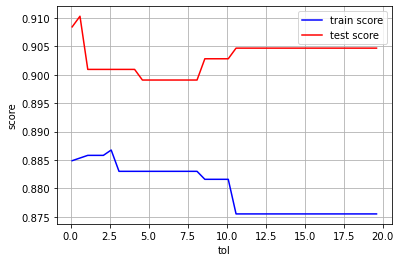

In [79]:
from sklearn.linear_model import LogisticRegression

train_score = []
test_score = []
Tol = []

for i in range(1,200,5):
    Tol.append(i*0.1)
    clf = LogisticRegression(tol=i*0.1,max_iter=100)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(Tol,train_score,'b',Tol,test_score,'r')
plt.grid()
plt.xlabel("tol")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [78]:
clf = LogisticRegression(tol=0.6,max_iter=100)
clf.fit(x_train,y_train)
LogisticRegression_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.885353299017314
test_score: 0.9102803738317757


### SVM

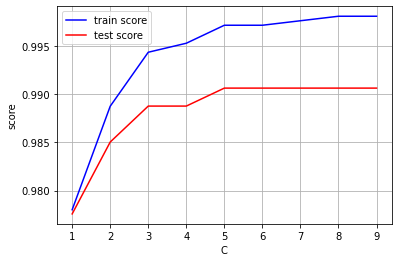

In [49]:
from sklearn import svm

train_score = []
test_score = []
C = []

for c in range(1,10,1):
    C.append(c)
    clf = svm.SVC(C=c)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(C,train_score,'b',C,test_score,'r')
plt.grid()
plt.xlabel("C")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [80]:
clf = svm.SVC(C=5)
clf.fit(x_train,y_train)
SVM_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.99719232569022
test_score: 0.9906542056074766


### kNN

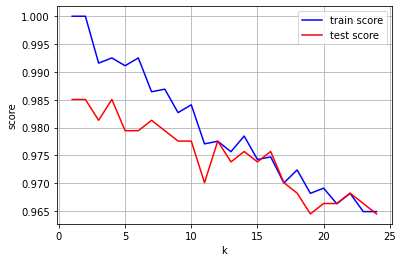

In [82]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
k_neighbors = []

for k in range(1,25):
    k_neighbors.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(k_neighbors,train_score,'b',k_neighbors,test_score,'r')
plt.grid()
plt.xlabel("k")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [84]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
kNN_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.9915769770706598
test_score: 0.9813084112149533


### Naïve Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
NaiveBayes_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.7931679925128685
test_score: 0.8411214953271028


### Adaboost

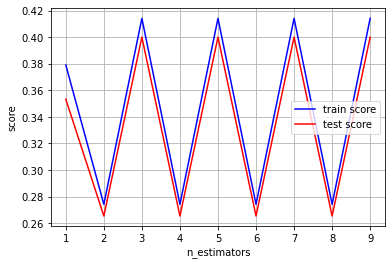

In [88]:
from sklearn.ensemble import AdaBoostClassifier

train_score = []
test_score = []
n_estimators_ = []
learning_rate = []

for n in range(1,10,1):
    n_estimators_.append(n)
    clf = AdaBoostClassifier(n_estimators=n,random_state=0)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))

plt.plot(n_estimators_,train_score,'b',n_estimators_,test_score,'r')
plt.grid()
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [89]:
clf = AdaBoostClassifier(n_estimators=3,random_state=0)
clf.fit(x_train,y_train)
AdaBoost_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.41413196069255964
test_score: 0.4


### LDA

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
clf.fit(x_train,y_train)
LDA_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.8146934955545156
test_score: 0.8261682242990654


## Métricas de evaluación

### Accuracy

$$\text{Accuracy} = \frac{\text{Número de casos correctas}}{\text{Total de casos}}$$

Es el método más sencillo para evaluar el rendimiento.

No es bueno ante datos no balanceados

In [122]:
from sklearn.metrics import accuracy_score

print("| Logistic Regression Accuracy |",accuracy_score(y_test,LogisticRegression_prediction),"|")
print("| SVM Accuracy                 |",accuracy_score(y_test,SVM_prediction)," |")
print("| kNN Accuracy                 |",accuracy_score(y_test,kNN_prediction),"|")
print("| Naive Bayes Accuracy         |",accuracy_score(y_test,NaiveBayes_prediction),"|")
#print("| Adaboost Accuracy            |",accuracy_score(y_test,AdaBoost_prediction),"|")
print("| LDA Accuracy                 |",accuracy_score(y_test,LDA_prediction),"|")

| Logistic Regression Accuracy | 0.9102803738317757 |
| SVM Accuracy                 | 0.9906542056074766  |
| kNN Accuracy                 | 0.9813084112149533 |
| Naive Bayes Accuracy         | 0.8411214953271028 |
| LDA Accuracy                 | 0.8261682242990654 |


### Recall

$$\text{Recall} = \frac{\text{Positivos verdaderos}}{\text{Positivos verdaderos + Negativos falsos}}$$

Recall: es la sensivilidad. Los casos positivos identificados como correctos entre los casos positivos reales. En otras palabras, la habilidad del modelo de encontrar loas casos relevantes.

Se usa más que todo con datos no balanceados.


In [121]:
from sklearn.metrics import recall_score

print("| Logistic Regression Accuracy |",recall_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",recall_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",recall_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",recall_score(y_test,NaiveBayes_prediction,average='macro'),"|")
#print("| Adaboost Accuracy            |",recall_score(y_test,AdaBoost_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",recall_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.9067420155521564 |
| SVM Accuracy                 | 0.9916666666666668  |
| kNN Accuracy                 | 0.983019801980198 |
| Naive Bayes Accuracy         | 0.8339426884409068 |
| LDA Accuracy                 | 0.8264854254686733 |


### Precision

$$\text{Precision} = \frac{\text{Positivos verdaderos}}{\text{Positivos verdaderos} + \text{Negativos verdaderos}}$$

Precision: Que tan cerca estan las medidas entre sí. Sin importar que estén cerca o lejos del valor deceado.

In [120]:
from sklearn.metrics import precision_score

print("| Logistic Regression Accuracy |",precision_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",precision_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",precision_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",precision_score(y_test,NaiveBayes_prediction,average='macro'),"|")
#print("| Adaboost Accuracy            |",precision_score(y_test,AdaBoost_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",precision_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.9060415741182364 |
| SVM Accuracy                 | 0.9902035026058261  |
| kNN Accuracy                 | 0.9804675009886843 |
| Naive Bayes Accuracy         | 0.8452862515680263 |
| LDA Accuracy                 | 0.8317741911530572 |


### F1-Score

$$\text{F1-Score} = \frac{2 \cdot \text{Precision} \cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$

Es la media armónica de *Precision* y *Recall*.

In [123]:
from sklearn.metrics import f1_score

print("| Logistic Regression Accuracy |",f1_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",f1_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",f1_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",f1_score(y_test,NaiveBayes_prediction,average='macro'),"|")
#print("| Adaboost Accuracy            |",f1_score(y_test,AdaBoost_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",f1_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.906230639733517 |
| SVM Accuracy                 | 0.9907896514301402  |
| kNN Accuracy                 | 0.9812528920084734 |
| Naive Bayes Accuracy         | 0.8342581109226928 |
| LDA Accuracy                 | 0.8262569445579906 |


### Validación cruzada

In [142]:
from sklearn.model_selection import cross_val_score

print("============================================================")
print("LogisticRegression_prediction \n")
model = LogisticRegression(tol=0.6,max_iter=100)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("SVM \n")
model = svm.SVC(C=5)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("kNN \n")
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("NaiveBayes \n")
model = GaussianNB()
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("LDA \n")
model = LDA()
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

LogisticRegression_prediction 

results: [0.79065421 0.8411215  0.90636704 0.79775281 0.78464419]
mean: 0.82410794917568
SVM 

results: [0.96635514 0.98317757 0.94569288 0.97003745 0.93258427]
mean: 0.9595694634043894
kNN 

results: [0.94018692 0.9588785  0.89700375 0.97752809 0.92883895]
mean: 0.9404872414155203
NaiveBayes 

results: [0.71588785 0.76261682 0.70599251 0.82958801 0.71348315]
mean: 0.7455136686618362
LDA 

results: [0.68598131 0.79439252 0.7247191  0.78838951 0.82397004]
mean: 0.7634904966922189


# 

In [119]:
from sklearn.metrics import precision_score, f1_score, classification_report

print("============================================================")
print("LogisticRegression_prediction \n")
print(classification_report(y_test,LogisticRegression_prediction))

print("============================================================")
print("SVM \n")
print(classification_report(y_test,SVM_prediction))

print("============================================================")
print("kNN \n")
print(classification_report(y_test,kNN_prediction))

print("============================================================")
print("NaiveBayes \n")
print(classification_report(y_test,NaiveBayes_prediction))

#print("============================================================")
#print("AdaBoost \n")
#print(classification_report(y_test,AdaBoost_prediction))

print("============================================================")
print("LDA \n")
print(classification_report(y_test,LDA_prediction))

LogisticRegression_prediction 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       120
           1       0.99      1.00      1.00       105
           2       0.84      0.84      0.84        94
           3       0.82      0.80      0.81       101
           4       0.95      0.99      0.97       115

    accuracy                           0.91       535
   macro avg       0.91      0.91      0.91       535
weighted avg       0.91      0.91      0.91       535

SVM 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       120
           1       0.99      1.00      1.00       105
           2       0.97      1.00      0.98        94
           3       1.00      1.00      1.00       101
           4       0.99      1.00      1.00       115

    accuracy                           0.99       535
   macro avg       0.99      0.99      0.99       535
weighted avg       0.99      0.99      

## Referencias

* [1] [Dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data)
* [2] [Enciclopedia médica de la Universidad de Rochester](https://www.urmc.rochester.edu/encyclopedia.aspx)
* [3] [Fixing Imbalanced Datasets: An Introduction to ADASYN](https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa)
* [4] [imblearn.over_sampling.ADASYN](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.ADASYN.html)